In [1]:
import numpy as np
import pandas as pd

**Load Dataset**

**Dataset Profiling**

In [2]:
df =pd.read_csv("Admission_Predict_Ver1.1.csv")

In [3]:
df.head(5)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop(columns=["Serial No."],inplace=True)

In [9]:
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


**Train Test Split**

In [10]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [11]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [12]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [16]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


**MinMaxscaler**

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler=MinMaxScaler()

In [19]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [20]:
x_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [21]:
import tensorflow

2023-11-27 16:24:23.569714: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [23]:
model=Sequential()

2023-11-27 16:24:24.891823: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


# With hidden layers

In [24]:
model.add(Dense(7,activation='relu' , input_dim=7))
model.add(Dense(7,activation='relu' ))
model.add(Dense(1,activation='linear'))

# Without hidden layers

In [25]:
#model.add(Dense(1,activation='relu', input_dim=7))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


**Train Model**

In [27]:
model.compile(loss='mean_squared_error' , optimizer='Adam')

# With 100 epochs

In [28]:
history=model.fit(x_train_scaled , y_train , epochs=100 ,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 26ms/step - loss: 0.5001 - val_loss: 0.4983
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4364 - val_loss: 0.4300
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.3739 - val_loss: 0.3613
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.3074 - val_loss: 0.2887
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.2409 - val_loss: 0.2172
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.1774 - val_loss: 0.1502
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.1193 - val_loss: 0.0924
Epoch 8/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0736 - val_loss: 0.0531
Epoch 9/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0447 - val_loss: 0.0338
Epoch 10/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0318 - val_loss: 0.0268
Epoch 1

# With 10 epochs

In [29]:
# history10 = model.fit(x_train_scaled, y_train, epochs = 10, validation_split = 0.2)

In [30]:
y_pred=model.predict(x_test_scaled)

4/4 [==============================] - 0s 3ms/step


# Performance of model

In [31]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7965450737126489

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


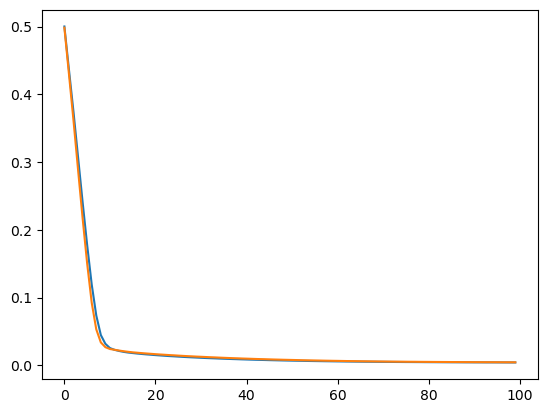

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Results are as follows (results as per when they were tested):

# R2 Score of model with 100 epochs = 0.7939996255094224
# R2 Score of model with 10 epochs = -0.061835391300533615

# R2 score of model with hidden layers = 0.648690167976816

# R2 score of model without hidden layers = -27.21233819825335